This project is intended to give you experience with supervised learning. Due Friday October 12th 2018, 5 pm EST.

We will make use of the handwritten digit data set, http://yann.lecun.com/exdb/mnist/.
There are four files you will need:
* train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

Tasks:
1. Unzip the above four files by using 
```shell
gzip -d filename
```
You do not need to (and probably should not) add these larger data files to your repository, but you may if you wish.  The person grading this assignment will link the data files to your jupyter notebook.
2. To load the data, it is easiest to install a python package which has already coded some import functions specifically for this data set:
```shell
pip install --user python-mnist
```
Then in your jupyter script, you can make use of:
```python
from mnist import MNIST
data = MNIST('path/to/data')
```
3. For the training data set, display a few of these images (at least one of each hand written digit).  We have not given you explicit instruction on how to view image files, but hopefully you can figure out how to use matplotlib's imshow command.
4. In your own words, explain how the K nearest neighbor (KNN) algorithm works.
5. Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value.
6. Apply a KNN Classifier with n_neighbors = {3,4,5}.  For each model, 
    * compute the confusion matrix, as applied to the test set
    * report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions.
    * compare the different models, 
7. Apply an SVM classifier.  Again, report the confusion matrix, as well as the accuracy, sensitivity, specificity, precision and negative predictive value.  How does the SVN classifier compare to the KNN classifiers?

# Answer of Each Question:

## 1. Unzip the above four files.

As, the downloaded files from `http://yann.lecun.com/exdb/mnist/` are in the form of zip files, so we have to unzip the files before using it. We can unzip the file either from command prompt or directly from jupyter notebook itself by using the following code.

In [ ]:
! gzip -d "C:/Users/Purnama/UN5550-Fall2018/projects/data/t10k-images-idx3-ubyte.gz"
! gzip -d "C:/Users/Purnama/UN5550-Fall2018/projects/data/t10k-labels-idx1-ubyte.gz"
! gzip -d "C:/Users/Purnama/UN5550-Fall2018/projects/data/train-images-idx3-ubyte.gz"
! gzip -d "C:/Users/Purnama/UN5550-Fall2018/projects/data/train-labels-idx1-ubyte.gz"

## 2. Load the data.

Before loading the data, we have to install the package that support machine learning execution like `mnist` package. The following code will do the job.

In [ ]:
! pip install --user python-mnist

The next step is to import the library that we need to enable the `minst` library, in this case, I also import all of the library that I am going to use for this project. 

In [2]:
import pandas as pd
import numpy as np
from mnist import MNIST # library for MNIST
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score


Next, we can load the data into the project by using the following code,

In [3]:
# This loads the dataset from system
data = MNIST()
#X, Y
train_images, train_labels = data.load_training()
test_images, test_labels =  data.load_testing()

IOError: [Errno 2] No such file or directory: '.\\train-labels-idx1-ubyte'

Notice that, there is an error prompt resulted from the code execution, this code is not working in my personal computer, however it works fine when I do the project using lab computer. As the above code are part of the question prompt, therefore I also included the information here.
To remedy this issue, I use a code chunk that I found in `stackoverflow` forum. The following code will enable us to load the data into the project.

In [23]:
import os
from urllib import urlretrieve

#retrieve the data from the source
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# We then define functions for loading MNIST images and labels.
# For convenience, we can also download the requested files if needed.
import gzip

#function for loading the file with images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, we reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, we convert them to float32 in range [0,1].
    return data / np.float32(256)

#function for loading the files with labels
def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now, that's exactly what we want.
    return data

#call the function and add the value into variable
X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

#source: https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter
#Date taken: 10/12/2018

The above code use `urlretrieve` library to retrieve the data from the url source. It then create a function to load the data and set a new variable to placed the return value from the function. We will used these new variable as our data source in this project. 

Then, we can convert the loaded data in the form of array to make it easier for us to call the data for future use.

In [5]:
train_images = np.asarray(X_train)
train_labels = np.asarray(y_train)
test_images = np.asarray(X_test)
test_labels = np.asarray(y_test)

## 3. Display handwritten digit

 The task are asking to display a few of these images (at least one of each hand written digit) for the training dataset. We can do this by using `imshow` function from `matplotlib` library.
 
 The following code, will do the job by printing the image through looping in order to have some different output. As the digit showed will be randomize, so we can expand the number of trial to get as many digit as we want.
 The code will print the output in a form of 5 columns and 4 rows.

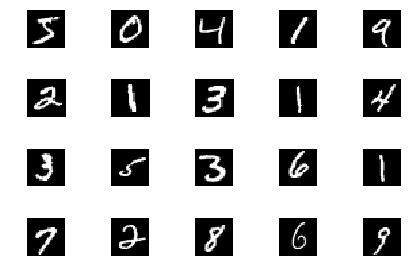

In [35]:
row = 4
column = 5
for i in range(row * column):
    image = np.array(train_images[i], dtype='float')
    newShape = image.reshape(28, 28)
    plt.subplot(row, column, i+1) 
    plt.imshow(newShape, cmap='gray')
    plt.axis('off')  
    
#plot the result
plt.tight_layout()
plt.show()


The above code, will do the loop and reshape the image into `28x28` dimension. The function `imshow` will take this new shape to construct the plot which will be displayed by using the command `plt.show()`

## 4. K-Nearest Neighbor


The k-Nearest neighbor algorithm is one of algorithm use for classifying an image. It rely on vectors. In short, the k-NN algorithm classified unknown data points through finding out the most common class among the `k` closest sample.
In order for the k-NN algorithm to work, 
- First need to find the distance between the indicated vectors to make the classification by using distance metric function.
- Then, make the classification by finding the nearest neighbor. In here, the category with the largest votes or the most appear in the `k` closest training points will be used as the label of the testing point.
- In addition, we can split our data into two sets: a training set and a testing set to train the classifier using various value of `k`, find the set that give the best performance through accuracy and also evaluate the classifier.





Notes: 

References: https://gurus.pyimagesearch.com/lesson-sample-k-nearest-neighbor-classification/

Accessed: 10/12/2018


## 5. Develop Function
Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value.


As required by the question, the following code will construct some function to compute the accuracy, sensitivity, specificity, precision, and negative predictive value. In this case, we define sensitivity as recall.

In [7]:
#function for computing the accuracy
def accuracy(tp, fp, tn, fn):
    """(TP+TN)/(TP+TN+FP+FN)"""
    return ((tp+tn)/(tp+fp+fn+tn))

#function for computing the recall
def recall(tp, fp, tn, fn):
    """TP/Real Positives"""
    return tp/(tp+fn)

#function for computing the specificity
def specificity (tp, fp, tn, fn):
    """TN/Real Negatives"""
    return tn/(tn+fp)

#function for computing the precision
def precision(tp, fp, tn, fn):
    """TP/(TP+FP)"""
    return tp/(tp+fp)

#function for computing the negative predictive value
def NegativePredictiveValue(tp, fp, tn, fn):
    """Tn/Predicted Negatives"""
    return tn/(tn+fn)

#function for computing the f1_score
def f1_score(tp, fp, tn, fn):
    """Harmonic average of precision and recall"""
    p=precision(tp, fp, tn, fn)
    r=recall(tp, fp, tn, fn)
    return 2*p*r/(p+r)  

The above code will take 4 arguments which are the true positive, false positive, true negative, and false negative from our data set. It then compute the variable based on the formula of each items or function. The execution of the code will be shown in the later part.



* TP: true positives: classifier predicts a sample as positive in accordance with ground truth
* FP: false positive: classifier predicts a sample as positive in conflict with ground truth
* TN: true negative:  classifier predicts a sample as negative in accordance with ground truth
* FN: false negative: classifier predicts a sample as negative in conflict with ground truth



Below is the formula use on the function:
* accuracy: $$ \text{accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.$$
* sensitivity:  $$ \text{sensitivity} = \frac{\text{TP}}{\text{TP + FN}}$$
* specificity: $$ \text{specificity} = \frac{\text{TN}}{\text{TN + FP} }$$
* precision: $$ \text{precision} = \frac{\text{TP}}{\text{TP + FP} }$$
* Negative Predictive Value: $$ \text{NPV} = \frac{\text{TN}}{\text{TN + FN} }$$







## 6. Using KNN Classifier

The task is asking to apply a KNN Classifier with n_neighbors = {3,4,5}.  For each model, 
   * compute the confusion matrix, as applied to the test set
   * report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions.
   * compare the different models, 


To handle this task, first we will do the code insequence with the order of the task. It means that we will compute the confusion matrix as the first step.

As the dataset has quite a lot of data, first we will try to limit data from the dataset that we are going to use to complete the task.


In [8]:
train_images1 = X_train[1:1000]
train_labels1 = y_train[1:1000]
test_images1 = X_test[1:1000]
test_labels1 = y_test[1:1000]

The above code will do the job, however, as I want to make sure that each data has the same dimension and want to separate between training and testing set, I will use the following code.

In [61]:
from sklearn import datasets

# load the MNIST digits dataset
mnist = datasets.load_digits()
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainImages, testImages, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1347
testing data points: 450


Next, we can apply the KNN classifier and define the number of neighbors that we will use to train and predict the data. 

We will print out the confusion matrix and the accuracy score in this part. The confusion matrix was used to evaluate the accuracy of a classification. The accuracy score will show how accurate the prediction is. There are three models that was asked from the question (3, 4, 5) as the value of the neighbor.

### 1. For Model = 3

In here, we will define the neighbor value as 3, train the classifier and predict it.

In [13]:
# re-train our classifier using the best k value and predict the labels of the
# test data
knnModel3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knnModel3.fit(trainImages, trainLabels)
predictions3 = knnModel3.predict(testImages)
 
# show a final classification report demonstrating the confusion matrix and
# accuracy of the classifier 
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testLabels, predictions3))
print("Accuracy Score:")
print(accuracy_score(predictions3, testLabels))

EVALUATION ON TESTING DATA
Confusion Matrix:
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  1]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 41  1  0  0  1]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  1  0  0  0  1 46]]
Accuracy Score:
0.9777777777777777


The above result shows that the prediction is almost 98 percent accurate.

We can also construct the confusion matrix by using a loop shown in the following code.

In [62]:
# confusion matrix code for 10x10
C = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C[i,j] = np.sum(np.logical_and(predictions3==i, testLabels==j))

#print(C)

Next, we will continue to the next set of task that was mentioned in the question which is reporting the accuracy, sensitivity, specificity, precision and negative predictive value using functions and compare the different models.

The following code will first define the false positive, false negative, true positive and true negative value of each model. Then it will call the function that we built in the previous question and will print out the result of each. 

This code is use to define the variable or argument to be used to call the function.

In [63]:
# define the value
fp3 = C.sum(axis=0)-np.diag(C)
fn3 = C.sum(axis=1)-np.diag(C)
tp3 = np.diag(C)
tn3 = C.sum()-np.diag(fp + fn + tp)

The following code will call the function that we previously declared. It will then convert the value in the form of dataframe to make the display a more visible.

In [ ]:
acc3 = pd.DataFrame(accuracy(tp3,fp3,tn3,fn3))
rec3 = pd.DataFrame(recall(tp3,fp3,tn3,fn3))
speci3 = pd.DataFrame(specificity(tp3,fp3,tn3,fn3))
prec3 = pd.DataFrame(precision(tp3,fp3,tn3,fn3))
negative3 = pd.DataFrame(NegativePredictiveValue(tp3,fp3,tn3,fn3))
f1score3 = pd.DataFrame(f1_score(tp3,fp3,tn3,fn3))

This code will print out the result from the function.

In [58]:
print("####################################################################")
print("Accuracy: ")
print(acc3)
print("####################################################################")
print("Recall: ")
print(rec3)
print("####################################################################")
print("Specificity: ")
print(speci3)
print("####################################################################")
print("Precision: ")
print(prec3)
print("####################################################################")
print("Negative Predictive Value: ")
print(negative3)
print("####################################################################")
print("F1 Score:")
print(f1score3)
print("####################################################################")


####################################################################
Accuracy: 
     0         1    2         3         4         5         6         7  \
0  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.998000  0.995976   
1  1.0  0.997778  1.0  0.993865  0.997959  0.995943  0.998000  0.995976   
2  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.998000  0.995976   
3  1.0  0.998004  1.0  0.993333  0.997959  0.995943  0.998000  0.995976   
4  1.0  0.998004  1.0  0.993865  0.997778  0.995943  0.998000  0.995976   
5  1.0  0.998004  1.0  0.993865  0.997959  0.995556  0.998000  0.995976   
6  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.997778  0.995976   
7  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.998000  0.995556   
8  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.998000  0.995976   
9  1.0  0.998004  1.0  0.993865  0.997959  0.995943  0.998000  0.995976   

          8         9  
0  0.993852  0.986083  
1  0.993852  0.986083  
2  0.993852  0.986083 

### 2. For Model = 4

In here, we will define the neighbor value as 4, train the classifier and predict it. It will also print out the confusion matrix and accuracy score.

In [15]:
# re-train our classifier using the best k value and predict the labels of the
# test data
knnModel4 = neighbors.KNeighborsClassifier(n_neighbors=4)
knnModel4.fit(trainImages, trainLabels)
predictions4 = knnModel4.predict(testImages)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("##### EVALUATION ON TESTING DATA #####")
print("Confusion Matrix:")
print(confusion_matrix(testLabels, predictions4))
print("Accuracy Score:")
print(accuracy_score(predictions4, testLabels))

##### EVALUATION ON TESTING DATA #####
Confusion Matrix:
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  1]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 41  1  0  0  1]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  1  0  0  0  0  0 34  1]
 [ 0  0  0  1  1  0  0  0  1 46]]
Accuracy Score:
0.9777777777777777


The above result shows that the prediction is almost 98 percent accurate.

We can also construct the confusion matrix by using a loop shown in the following code.

In [66]:
# confusion matrix code for 10x10
C = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C[i,j] = np.sum(np.logical_and(predictions4==i, testLabels==j))

#print(C)

Next, we will continue to the next set of task that was mentioned in the question which is reporting the accuracy, sensitivity, specificity, precision and negative predictive value using functions and compare the different models.

The following code will first define the false positive, false negative, true positive and true negative value of each model. Then it will call the function that we built in the previous question and will print out the result of each. 

This code is use to define the variable or argument to be used to call the function.

In [69]:
# define the value
fp4 = C.sum(axis=0)-np.diag(C)
fn4 = C.sum(axis=1)-np.diag(C)
tp4 = np.diag(C)
tn4 = C.sum()-np.diag(fp + fn + tp)

The following code will call the function that we previously declared. It will then convert the value in the form of dataframe to make the display a more visible.

In [70]:
acc4 = pd.DataFrame(accuracy(tp4,fp4,tn4,fn4))
rec4 = pd.DataFrame(recall(tp4,fp4,tn4,fn4))
speci4 = pd.DataFrame(specificity(tp4,fp4,tn4,fn4))
prec4 = pd.DataFrame(precision(tp4,fp4,tn4,fn4))
negative4 = pd.DataFrame(NegativePredictiveValue(tp4,fp4,tn4,fn4))
f1score4 = pd.DataFrame(f1_score(tp4,fp4,tn4,fn4))

This code will print out the result from the function.

In [59]:
print("####################################################################")
print("Accuracy: ")
print(acc4)
print("####################################################################")
print("Recall: ")
print(rec4)
print("####################################################################")
print("Specificity: ")
print(speci4)
print("####################################################################")
print("Precision: ")
print(prec4)
print("####################################################################")
print("Negative Predictive Value: ")
print(negative4)
print("####################################################################")
print("F1 Score:")
print(f1score4)
print("####################################################################")


####################################################################
Accuracy: 
     0         1         2         3         4         5         6         7  \
0  1.0  0.998004  0.997992  0.993865  0.997959  0.995943  0.998000  0.997988   
1  1.0  0.997778  0.997992  0.993865  0.997959  0.995943  0.998000  0.997988   
2  1.0  0.998004  0.997783  0.993865  0.997959  0.995943  0.998000  0.997988   
3  1.0  0.998004  0.997992  0.993333  0.997959  0.995943  0.998000  0.997988   
4  1.0  0.998004  0.997992  0.993865  0.997778  0.995943  0.998000  0.997988   
5  1.0  0.998004  0.997992  0.993865  0.997959  0.995556  0.998000  0.997988   
6  1.0  0.998004  0.997992  0.993865  0.997959  0.995943  0.997778  0.997988   
7  1.0  0.998004  0.997992  0.993865  0.997959  0.995943  0.998000  0.997778   
8  1.0  0.998004  0.997992  0.993865  0.997959  0.995943  0.998000  0.997988   
9  1.0  0.998004  0.997992  0.993865  0.997959  0.995943  0.998000  0.997988   

          8         9  
0  0.991803  0.

### 3. For Model = 5

In here, we will define the neighbor value as 5, train the classifier and predict it. It will also print out the confusion matrix and accuracy score.

In [16]:
# re-train our classifier using the best k value and predict the labels of the
# test data
knnModel5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knnModel5.fit(trainImages, trainLabels)
predictions5 = knnModel5.predict(testImages)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("##### EVALUATION ON TESTING DATA #####")
print("Confusion Matrix:")
print(confusion_matrix(testLabels, predictions5))
print("Accuracy Score:")
print(accuracy_score(predictions5, testLabels))

##### EVALUATION ON TESTING DATA #####
Confusion Matrix:
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  1  0  1]
 [ 0  0  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 41  1  0  0  1]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  1  0  0  0  0  0 34  1]
 [ 0  0  0  1  1  0  0  0  1 46]]
Accuracy Score:
0.9733333333333334


The above result shows that the prediction is almost 98 percent accurate.

We can also construct the confusion matrix by using a loop shown in the following code.

In [68]:
# confusion matrix code for 10x10
C = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C[i,j] = np.sum(np.logical_and(predictions5==i, testLabels==j))

#print(C)


Next, we will continue to the next set of task that was mentioned in the question which is reporting the accuracy, sensitivity, specificity, precision and negative predictive value using functions and compare the different models.

The following code will first define the false positive, false negative, true positive and true negative value of each model. Then it will call the function that we built in the previous question and will print out the result of each. 

This code is use to define the variable or argument to be used to call the function.

In [71]:
# define the value
fp5 = C.sum(axis=0)-np.diag(C)
fn5 = C.sum(axis=1)-np.diag(C)
tp5 = np.diag(C)
tn5 = C.sum()-np.diag(fp + fn + tp)

The following code will call the function that we previously declared. It will then convert the value in the form of dataframe to make the display a more visible.

In [72]:
acc5 = pd.DataFrame(accuracy(tp5,fp5,tn5,fn5))
rec5 = pd.DataFrame(recall(tp5,fp5,tn5,fn5))
speci5 = pd.DataFrame(specificity(tp5,fp5,tn5,fn5))
prec5 = pd.DataFrame(precision(tp5,fp5,tn5,fn5))
negative5 = pd.DataFrame(NegativePredictiveValue(tp5,fp5,tn5,fn5))
f1score5 = pd.DataFrame(f1_score(tp5,fp5,tn5,fn5))

This code will print out the result from the function.

In [60]:
print("####################################################################")
print("Accuracy: ")
print(acc5)
print("####################################################################")
print("Recall: ")
print(rec5)
print("####################################################################")
print("Specificity: ")
print(speci5)
print("####################################################################")
print("Precision: ")
print(prec5)
print("####################################################################")
print("Negative Predictive Value: ")
print(negative5)
print("####################################################################")
print("F1 Score:")
print(f1score5)
print("####################################################################")


####################################################################
Accuracy: 
     0         1         2         3         4         5         6         7  \
0  1.0  0.998004  0.997992  0.991820  0.995918  0.993927  0.998000  0.995984   
1  1.0  0.997778  0.997992  0.991820  0.995918  0.993927  0.998000  0.995984   
2  1.0  0.998004  0.997783  0.991820  0.995918  0.993927  0.998000  0.995984   
3  1.0  0.998004  0.997992  0.991111  0.995918  0.993927  0.998000  0.995984   
4  1.0  0.998004  0.997992  0.991820  0.995556  0.993927  0.998000  0.995984   
5  1.0  0.998004  0.997992  0.991820  0.995918  0.993348  0.998000  0.995984   
6  1.0  0.998004  0.997992  0.991820  0.995918  0.993927  0.997778  0.995984   
7  1.0  0.998004  0.997992  0.991820  0.995918  0.993927  0.998000  0.995565   
8  1.0  0.998004  0.997992  0.991820  0.995918  0.993927  0.998000  0.995984   
9  1.0  0.998004  0.997992  0.991820  0.995918  0.993927  0.998000  0.995984   

          8         9  
0  0.991803  0.

We can also able to directly display the precision, recall, f1 score, and support by using classification_report function. The code below will do the report for each of the model.

In [75]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA | Model = 3")
print(classification_report(predictions3, testLabels))

EVALUATION ON TESTING DATA | Model = 3
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       1.00      0.98      0.99        51
          2       1.00      1.00      1.00        47
          3       0.95      0.97      0.96        37
          4       1.00      0.97      0.99        40
          5       0.95      1.00      0.98        41
          6       1.00      0.98      0.99        50
          7       0.98      0.98      0.98        46
          8       0.95      0.97      0.96        36
          9       0.94      0.92      0.93        50

avg / total       0.98      0.98      0.98       450



In [74]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA | Model = 4")
print(classification_report(predictions4, testLabels))

EVALUATION ON TESTING DATA | Model = 4
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       1.00      0.98      0.99        51
          2       1.00      0.98      0.99        48
          3       0.95      0.97      0.96        37
          4       1.00      0.97      0.99        40
          5       0.95      1.00      0.98        41
          6       1.00      0.98      0.99        50
          7       1.00      0.98      0.99        47
          8       0.92      0.97      0.94        35
          9       0.94      0.94      0.94        49

avg / total       0.98      0.98      0.98       450



In [73]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA | Model = 5")
print(classification_report(predictions5, testLabels))

EVALUATION ON TESTING DATA | Model = 5
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       1.00      0.98      0.99        51
          2       1.00      0.98      0.99        48
          3       0.92      0.97      0.95        36
          4       0.97      0.97      0.97        39
          5       0.95      0.98      0.96        42
          6       1.00      0.98      0.99        50
          7       1.00      0.96      0.98        48
          8       0.92      0.97      0.94        35
          9       0.94      0.94      0.94        49

avg / total       0.97      0.97      0.97       450



In summary, there is no significant differences between the three result. All the calculation result are almost the same with only slightly different in the average of accuracy between model = 5 and the other two models.

## 7. Apply SVM Classifier

Apply an SVM classifier.  Again, report the confusion matrix, as well as the accuracy, sensitivity, specificity, precision and negative predictive value.  How does the SVN classifier compare to the KNN classifiers?

To do this task first we wll need to import the svm library which we will already imported in the previous session and change the classfier into svm.

Apply the SVM classifier to train and predict the data. We will print out the confusion matrix and the accuracy score in this part. The confusion matrix was used to evaluate the accuracy of a classification. The accuracy score will show how accurate the prediction is. Different from the KNN classifier, SVM does not need model or number of neighbor to proceed the classification process.

The following code will declare the svm classifier and do the training and testing of the prediction. 

In [88]:
svcclassifier = svm.SVC() #declare the svm classifier
svcclassifier.fit(trainImages, trainLabels) # do the training
y_pred = svcclassifier.predict(testImages)  # predict

The following code will print out the confusion matrix and the accuracy score.

In [89]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred, testLabels))  
print("Accuracy Score:")
print(accuracy_score(y_pred, testLabels))

Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [33 38 36 38 13 26 28 35 33 43]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  6]]
Accuracy Score:
0.36666666666666664


The above result shows that the prediction is 36 percent accurate. Which is quite smaller compare to the result from KNN classsfier.

We can also construct the confusion matrix by using a loop shown in the following code.

In [85]:
# confusion matrix code for 10x10
C = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C[i,j] = np.sum(np.logical_and(y_pred==i, testLabels==j))

Next, we will continue to the next set of task that was mentioned in the question which is reporting the accuracy, sensitivity, specificity, precision and negative predictive value using functions.

The following code will first define the false positive, false negative, true positive and true negative value. Then it will call the function that we built in the previous question and will print out the result of each. 

This code is use to define the variable or argument to be used to call the function.

In [86]:
# define the value
fp4 = C.sum(axis=0)-np.diag(C)
fn4 = C.sum(axis=1)-np.diag(C)
tp4 = np.diag(C)
tn4 = C.sum()-np.diag(fp + fn + tp)

The following code will call the function that we previously declared. It will then convert the value in the form of dataframe to make the display become more visible.

In [ ]:
acc4 = pd.DataFrame(accuracy(tp4,fp4,tn4,fn4))
rec4 = pd.DataFrame(recall(tp4,fp4,tn4,fn4))
speci4 = pd.DataFrame(specificity(tp4,fp4,tn4,fn4))
prec4 = pd.DataFrame(precision(tp4,fp4,tn4,fn4))
negative4 = pd.DataFrame(NegativePredictiveValue(tp4,fp4,tn4,fn4))
f1score4 = pd.DataFrame(f1_score(tp4,fp4,tn4,fn4))

This code will print out the result from the function.

In [87]:
print("####################################################################")
print("Accuracy: ")
print(acc4)
print("####################################################################")
print("Recall: ")
print(rec4)
print("####################################################################")
print("Specificity: ")
print(speci4)
print("####################################################################")
print("Precision: ")
print(prec4)
print("####################################################################")
print("Negative Predictive Value: ")
print(negative4)
print("####################################################################")
print("F1 Score:")
print(f1score4)
print("####################################################################")


####################################################################
Accuracy: 
          0         1         2         3         4         5         6  \
0  0.926667  0.924000  0.927565  0.631307  0.973415  0.947262  0.943888   
1  0.934263  0.915367  0.927565  0.631307  0.973415  0.947262  0.943888   
2  0.934263  0.924000  0.920000  0.631307  0.973415  0.947262  0.943888   
3  0.934263  0.924000  0.927565  0.611717  0.973415  0.947262  0.943888   
4  0.934263  0.924000  0.927565  0.631307  0.971047  0.947262  0.943888   
5  0.934263  0.924000  0.927565  0.631307  0.973415  0.942222  0.943888   
6  0.934263  0.924000  0.927565  0.631307  0.973415  0.947262  0.937639   
7  0.934263  0.924000  0.927565  0.631307  0.973415  0.947262  0.943888   
8  0.934263  0.924000  0.927565  0.631307  0.973415  0.947262  0.943888   
9  0.934263  0.924000  0.927565  0.631307  0.973415  0.947262  0.943888   

          7         8         9  
0  0.929435  0.932238  0.913828  
1  0.929435  0.932238  0.9

We can also able to directly display the precision, recall, f1 score, and support by using classification_report function. The code below will do the report.

In [83]:
print(classification_report(testLabels, y_pred))  

             precision    recall  f1-score   support

          0       1.00      0.37      0.54        52
          1       1.00      0.24      0.39        50
          2       1.00      0.23      0.38        47
          3       0.12      1.00      0.21        38
          4       1.00      0.67      0.80        39
          5       1.00      0.40      0.57        43
          6       1.00      0.43      0.60        49
          7       1.00      0.24      0.39        46
          8       1.00      0.11      0.20        37
          9       1.00      0.12      0.22        49

avg / total       0.93      0.37      0.43       450



To conclude, although the accuracy score of KNN was shown to be higher than svm classifier, the SVM classifier is more easy to use and more accurate. The KNN result might be affected by outliers and it needs approximation to the nearest neihbour. On the other hand, SVM can handle the outliers, so their result will not be affected by the existance of outliers. The SVM is much more faster than the KNN, while the KNN work depend on the number of observations and neighbours. The more sample you have the longer it tooks for KNN classifier to find the `k` nearest neighbor.